# Laboratorio Spice

**El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos SPICE y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.**

 ## El estándar SPICE

SPICE es una abreviabiación de Simulation Program with Integrated Circtuit Emphasis. Se trata básicamente de un método estándar para describir circuitos usando texto plano en lugar de una representación gráfica (o esquemática). A esta descripción en texto se la llama también netlist y básicamente se corresponde con la lista de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión. Los ficheros netlist pueden tener extensiones .cir, .net, .ckt, ó .sp y es muy común encontrárselos con cualquiera de estas.

Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta open source y regidos por distintas comunidades de usuarios y programadores.

**Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:**

| Intérprete |    Licencia    |     Fabricante       | Características  |
| ---------- | -------------- | -------------------- | ---------------- |
| Ahkab      | GPL            | Giuseppe Venturini   | Basado en Python |
| PSpice     | Propietario    |Cadence Design Systems| Basado en C/C++  |
| Ngspice    | New BSD license|Comunidad de usuarios | Basado en C      |
| macspice   | Free           |Charles D. H. Williams| Basado en C      |
| LTspice    | Freeware       |Mike Engelhardt       | Basado en C      |

**¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software?**

En mi opinión,la principal diferencia entre estos dos lenguajes de alto nivel es que C es un lenguaje con el que utilizamos compiladores con la finalidad de traducir sus líneas escritas en alto nivel a un ejecutable que puede ejecutar el procesador y Spice es un lenguaje interpretado, precisa de intérpretes software para poder trabajar con este lenguaje."

**¿Qué implementaciones reales (compiladores) del lenguaje C conoces?**

En sistemas linux conozco el compilador GCC ,para entorno windows conozco Dev C++."


**Elementos de un netlist**

Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

Comentarios
La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un *. Ejemplo:

Mi primer circuito
* Otro comentario
* más comentarios
*

**Dispositivos básicos de un circuito**


Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo, tales como resistencias, condensadores, bobinas, interruptores, hilos y fuentes de alimentación. Para distinguir uno de otro, se reserva una letra característica: V para fuentes de alimentación, R para resistencias, C para condensadores y L para bobinas. También es posible usar estas letras en su versión en minúscula (r, v, c, l, etc.). Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

* Una resistencia
R1
*  Otra resistencia
R2
* Fuente de alimentación
V
* Un condensador
Cprincipal

**Conexiones**

A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles son los puntos de unión tanto a un lado como al otro del elemento. Así es como Spice sabe qué está conectado a qué: porque comparten un punto (o nodo, aunque este término se reserva sobretodo a uniones de más de dos elementos) que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una numeración secuencial: 0...n. La enumeración de los puntos de unión es completamente a nuestro criterio.

* Una resistencia
* entre cables 0 y 1
R1 0 1
Sólo es necesario seguir un criterio: en el caso de una fuente de alimentación, el nodo que pondremos primero será aquel que está más cerca del borne positivo. Ejemplo:

* Para una fuente indicamos primeramente conexión a nodo positivo.
v 2 3 type=vdc vdc=1
En el caso de LTspice no es necesario indicar los parámetros type=vdc y vdc=X, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

<img src="conectores.jpg">

**Unidades en SPICE**


Las unidades de las magnitudes características del circuito son siempre unidades del Sistema Internacional y no es necesario indicarlo explícitamente en el netlist.

La forma de especificar múltiplos de estas cantidades es añadiendo una letra. Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son k para "kilo-," m para "mili?" y u para "micro?".

**Pregunta: Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.**

| Factor     |    Prefijo     |     Símbolo          | 
| ---------- | -------------- | -------------------- |
|$10^{18}$   | exa            |       E              | 
| $10^{15}$  | peta           |       P              | 
| $10^{12}$  | tera           |       T              | 
| $10^{9}$   | giga           |       G              | 
| $10^{6}$   | mega           |       M              | 
|$10^{3}$    | kilo           |       K              | 
| $10^{2}$   | hecto          |       h              | 
| $10^{-1}$  | deci           |       d              | 
| $10^{-2}$  | centi          |       c              | 
| $10^{-3}$  | mili           |       m              | 
|$10^{-6}$   | micro          |       μ              | 
| $10^{-9}$  | nano           |       n              | 
|$10^{-12}$  | pico           |       p              | 
|$10^{-15}$  | femto          |       f              | 
|$10^{-18}$  | atto           |       a              | 
 




En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (vdc) o alterna (ac).

* Una resistencia de 5 Ohmios
R2 1 0 5
* Una pila de 10 Voltios (continua)
V1 1 0 type=vdc vdc=10
* Una resistencia de 5 kΩ
RX 2 4 5k

**¿Qué unidades del Sistema Internacional relacionadas con la asignatura -y los circuitos en general– conoces?**

| Parámetro  | Unidad de medida   |    Símbolo         | 
| ---------- |------------------- | ------------------ |
| voltaje    | voltio             |       V            | 
| corriente  | amperio            |       A            |                  
|resistencia | ohmio              |       Ω            |                  
|conductancia|siemens             |       G            |
|capacidad   |faradio             |       F            |
|carga       |culombio            |       C            |
|inductancia |henrio              |       L            | 
|potencia    |vatio               |       W            |
|frecuencia  |hertz               |       Hz           | 
|longitud    |metro               |       m            | 
|masa        |kilogramo           |       Kg           |
|intensidad del campo magnético | Tesla |  T         |    
|cantidad de sustancia          | mol   |  mol         | 
|intensidad luminosa            | candela |  cd        | 

Valores iniciales
Aparecen justo al final de la definición del componente (ic). Suelen aplicarse principalmente con condensadores.

* Una condensador inicialmente no cargado
c 1 0 1u ic=0
Fin del circuito
El fin de la descripción de un netlist se especifica mediante el comando .end.

* Mi primer circuito
V 1 0 vdc=10 type=vdc
R 1 0 5
* Fin del circuito
.end

**Comandos SPICE para circuitos en corriente continua**

Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar la salida de la simulación. Los comandos en Spice empiezan por un . y suelen escribirse justo al final del circuito, pero antes del comando .end.

 Mi primer circuito
* Aquí van los componentes
R 1 0 6k
...
* Comandos
.op
...
* Fin del circuito
.end

**Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta.**

Desde mi punto de vista.el lenguaje Spice, lo enmarcaría dentro de los lenguajes específicos de dominio, ya que no es un lenguaje de propósito general dado que tiene su utilidad enfocada en la creación de los circuitos eléctricos.


**Veamos los principales comandos de simulación:**


.op es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
.dc es uy parecido al comando .op pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B. En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:
* Variamos el valor del voltaje
* de la fuente "v" de 1 a 1000
* en pasos de 5 voltios
v 1 0 type=vdc vdc=10
.dc v 1 start=1 stop=1000 step=20
v2a 2 4 type=vdc vdc=9
* Igual para v2a. Se ignora su voltaje de 9V
.dc v2a start=0 stop=10 step=2
El comando .tran realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo tfinal. y en intervalos tstep. Si empleamos un varlor distinto para parámetro uic, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente ic=X en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).
* Hacemos avanzar el tiempo entre
* tinicial y tfinal en pasos tstep
.tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
X, Y y Z tienen, evidentemente unidades de tiempo en el S.I. (segundos).

**El parámetro uic puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la documentación de Ahkab.**.

UIC (condiciones de uso iniciales): Esto se utiliza para especificar el estado del circuito en el momento **t - tstart.**
Los valores disponibles son 0, 1, 2 y 3.

| Estado      |                                  Descripción                                                                 
| ----------- | ---------------------------------------------------------------------------------------------|
| uic = 0     | Todas las tensiones y corrientes de nodo a través de fuentes v/h/e/ son cero a t=tstart      |
| uic = 1     | El estatus a ‘t = tstart es el último resultado de un OP analisis                            |
| uic = 2     | Es el último resultado de un análisis de OP en el que se establecen los valores de corrientes|
| uic = 3     | Cargue un ic proporcionado por el usuario. Esto requiere una directiva .ic                   |

**Intérprete SPICE que vamos a usar: Ahkab**


Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.

**Comenta las distintas implementaciones de lenguajes y estándares que conozcas.**

|Lenguajes de programación|
|-------------------------|
|Ahkab python para estandar Spice   |
|Anaconda python   |
|ActivePython  |
|SimPy para Python   |



**Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.)**

Ahkab es un simulador de circuito interactivo de código abierto,es muy similar a SPICE.Ahkab se puede utilizar desde Python como módulo y desde el shell a través de su interfaz de línea de comandos. Giuseppe Venturini un ingeniero electrónico es el creador de este software, con la ayuda de los señores Ian Daniher y Rob Crowther .
Ahkab v0.18 se lanzó el 18 de julio de 2015,con una licencia GLP v2.Las depencencias son numpy, scipy, sympy, matplotlib y tabulate.

SIMULACIONES COMPATIBLES:

 - Análisis de Corriente continua. 
 - Análisis de transitorios , fórmulas de diferenciación disponibles: Euler implícito, trapezoidal.
 - Análisis Corriente alterna.
 - Análisis periódico de estado estable de circuitos no autónomos, disparos en el dominio del tiempo y algoritmos de fuerza bruta.

**Trabajo práctico**


Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.

Instalación de bibliotecas necesarias
Si estás utilizando Anaconda, asegúrate de tener su entorno activado:

C:\> conda activate base (en el caso de Windows)
ó

$ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando conda (visita la sección de Environment Variables del Panel de Control). Si has instalado Anaconda con esta opción marcada, ya no tienes que preocuparte por ello.

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado.

También puedes instalar Ahkab directamente desde este mismo notebook:

In [101]:
pip install ahkab

Note: you may need to restart the kernel to use updated packages.


Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el REPL como desde un entorno Jupyter (Jupyter, Jupyterlab, VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su documentación oficial.



Como vamos a pintar algunas gráficas, necesitamos instlar matplotlib. Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda:

In [102]:
conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [103]:
import pylab as plt
import ahkab

**¿Qué es y para qué sirve PyLab?**

PyLab es un conjunto de librerías entre las que se incluyen numpy, scipy, sympy, pandas, matplotlib, ipython. Con estas librerias podremos usar al interprete de Python como si de fuera Matlab y hacer nuestros archivos .py como si fueran scripts de MatLab.


# Circuitos sencillos para trabajar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

**Comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.**

La ecuación: $V=\Omega *Amperios$ tiene que ser voltios igual a ohmios por amperios, la ecuación no puede ser milivoltios igual a ohmios por amperios,las unidades tienes que estar en la misma magnitud.
Por ejemplo,sí montamos un circuito sencillo de una resistencia conectada a una pila de 12 voltios,podemos calcular la intensidad:

$$
I=\frac{V}{\Omega }
$$


$$
I=\frac{12V}{\ 1000 Omega  } =0.012 amperios
$$
Por lo tanto:
$$
12V=1000\Omega *0.012amperios
$$
Y nunca podría ser así:

$$
12mV\neq 1000\Omega *0.012amperios
$$

Comencemos con el circuito más sencillo posible de todos:

<img src="circuitosencillo.jpg">

Vamos a escribir su contenido (componentes o netlist) en disco con el nombre circuito sencillo.sp. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los comandos mágicos de este entorno de programación literaria. En concreto vamos a utilizar %%writefile que guarda los contenidos de una celda como un fichero.

In [104]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 100
v1 1 0 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [105]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

Separamos la información del netlist (componentes) de los análisis (uno de tipo op y otro de tipo dc):

In [106]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


**Pregunta: ¿qué tipo de estructura de Python es lista_de_análisis?**

El tipo de estructura es una lista y cada elemento es un diccionario.

Las simulaciones que implican listas de datos (.dc, .tran, etc.) necesitan de un fichero temporal (outfile) donde almacenar los resultados. Para ello tenemos que definir la propiedad outfile.

In [107]:
lista_de_análisis[1]['outfile'] = "simulación dc.tsv"

**Pregunta: escribe el código Python necesario para identificar qué análisis de lista_de_análisis son de tipo dc ó tran y sólo añadir la propiedad outfile en estos casos. Aquí tenéis un post de Stackoverflow con algo de ayuda. Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo dc. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo tran y/o dc.**

In [108]:
# Nos declaramos un contador que indicara cuantos analisis cumplen la condicion de tipo 'dc' o 'tran'
counter = 0
# Recorremos los elementos de la lista de analisis, cada elemento de la lista sera un diccionario
for analisis in lista_de_análisis:
    # Comprobamos que la propiedad "type" del analisis actual sea dc o tran
    if analisis.get('type', None) in ['dc', 'tran']:
        # En el caso de que type sea dc o tran, asignamos la propiedad "outfile" al analisis actual
        # indicandole como fichero de salida el nombre outfileX.tsv, dodne X es un contador
        # Le ponemos un numero en el fichero de salida por si acaso hubiera mas de un registor que cumple la
        # condicion (no pisemos el fichero de salida) e incrementamos el contador
        analisis['outfile'] = f'outfile{counter}.tsv'
        counter = counter + 1

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método .run de Ahkab:

In [109]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


Resultados de la simulación .dc

Imprimimos información sobre la simulación de tipo .dc:

In [110]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2020-12-24 09:34:19, data file outfile0.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [111]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


**Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (V1) con respecto a la intensidad del circuito (I(V1)).**

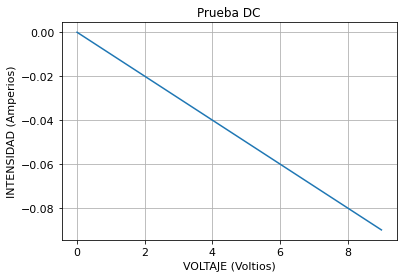

In [112]:
figura = plt.figure()
plt.title("Prueba DC")
plt.ylabel("INTENSIDAD (Amperios)")
plt.xlabel("VOLTAJE (Voltios)")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")
plt.grid()

**Comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede viajar solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de ayuda. ¿Qué biblioteca estamos usando para graficar?**

Estamos viendo una representación lineal de la intensidad que circula por la resistencia del circuito respecto a la tensión de la bateria que se aplica.
La biblioteca que estamos utilizando para graficar es Matplotlib.

In [113]:
print(resultados['op'].results)

{V1: 9.0, I(V1): -0.09}


**Justifica el sencillo resultado anterior (análisis op). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).**

In [114]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [115]:
import mpmath

In [116]:
import sympy

In [117]:
#Tensión de la Bateria es igual a 9 voltios
Bateria=9
#Resistencia igual a 100 ohmios 
Resistencia=100
#Calculamos el valor de la intensidad aplicando la ley de ohm (V=R*I)
Intensidad=Bateria/Resistencia
print("La tensión de la bateria del circuito es ", Bateria, "voltios")
print("La Resistencia del circuito es ",Resistencia,"ohmios")
print("Aplicamos la ley de ohm (V=R*I):")
print("La intensidad que circula por el circuito es ",Intensidad,"Amperios")

La tensión de la bateria del circuito es  9 voltios
La Resistencia del circuito es  100 ohmios
Aplicamos la ley de ohm (V=R*I):
La intensidad que circula por el circuito es  0.09 Amperios


**Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte
a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:**

In [118]:
import platform
%alias lts /ApplicationsC:\Program Files\LTC\LTspiceXVII/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

**Pregunta: ¿Qué significan las opciones -b y -ascii?**

El flag **-b** es para ejecutar en modo batch.
El flag **-ascii** es para utilizar archivos ASCII.raw 

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión .net:

In [119]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 1 0 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [120]:
lts "circuito sencillo.net"

Veamos el contenido de la simulación.

In [121]:
%pycat circuito sencillo.log

Ahora repitamos lo mismo para el análisis .dc:

In [122]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end

Overwriting circuito sencillo.net


In [123]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero .raw con los resultados. Es muy parecido al outfile que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete ltspice de Python, el cual podéis instalar directamente desde Jupyter:

In [124]:
pip install ltspice

Ahora ya podemos leer este fichero .raw y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

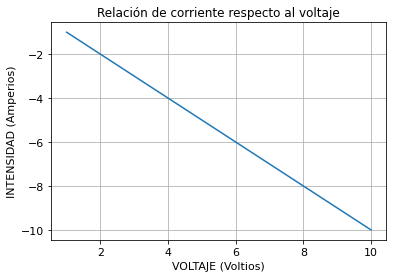

In [125]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
plt.ylabel("INTENSIDAD (Amperios)")
plt.xlabel("VOLTAJE (Voltios)")
plt.title("Relación de corriente respecto al voltaje")
time = l.get_time()
V1 = l.get_data('V(1)')
plt.plot(time, V1)
plt.grid()

In [126]:
!ahkab "circuito sencillo.sp"

2020-12-24 09:34:36

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.
Traceback (most recent call last):
  File "c:\programdata\anaconda6\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\programdata\anaconda6\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda6\Scripts\ahkab.exe\__main__.py", line 7, in <module>
  File "c:\programdata\anaconda6\lib\site-packages\ahkab\__main__.py", line 155, in _cli
    ahkab.main(filename=remaning_args[0],


ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value         Error    %
----------  -------  -------  ------------  ---
V1          V           9     -9.00001e-12    0
I(V1)       A          -0.09   0              0

ELEMENTS OP INFORMATION:




  File "c:\programdata\anaconda6\lib\site-packages\ahkab\ahkab.py", line 953, in main
    results.update(run(circ, [an]))
  File "c:\programdata\anaconda6\lib\site-packages\ahkab\ahkab.py", line 714, in run
    r = analysis[an_type](circ, **an_item)
  File "c:\programdata\anaconda6\lib\site-packages\ahkab\dc_analysis.py", line 685, in op_analysis
    opsolution.write_to_file(filename='stdout')
  File "c:\programdata\anaconda6\lib\site-packages\ahkab\results.py", line 469, in write_to_file
    fp.write(t + '\n\n')
  File "c:\programdata\anaconda6\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u2126' in position 16: character maps to <undefined>


[](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Vamos a resolver (en punto de operación) el siguiente circuito:


<img src="RESISTENCIAS.jpg">

Ejercicio premium: Graficar los datos anteriores con Gnuplot.

He realizado un script en python para recoger los datos del archivo circuito sencillo.raw y volcarlos en un archivo llamado datos.dat

values = []


with open('circuito sencillo.raw', 'r') as reader:
    values_found = False
    line = reader.readline()

    while line != '' and not values_found:
        line = reader.readline().strip()
        if line == 'Values:':
            values_found = True

    while line != '':
        line = reader.readline().strip()
        line = reader.readline().strip()
        line = reader.readline().strip()
        # Solo agregamos la 3era linea de cada bloque de 4
        if line != '':
            values.append(float(line))

        line = reader.readline().strip()

with open('datos.dat', 'w') as writer:
    idx = 0
    for value in values:
        print(value, file=writer, end=' ')
        print(idx, file=writer, end='\n')
        idx = idx + 1

El archivo datos.dat ,tiene este formato,sólo pondre los primeros valores ya que tiene más de mil:

-0.01 0
-0.01009 1
-0.01018 2
-0.01027 3
-0.01036 4
-0.01045 5
-0.01053999999999999 6
-0.01062999999999999 7
-0.01071999999999999 8

He creado un script de Gnuplot en el que grafico los datos del archivo datos.dat:

set terminal png size 1024,768
set output "plot.png"

set xlabel "Titulo X"
set ylabel "Titulo Y"

set yzeroaxis


set boxwidth 0.05 absolute
set style fill solid 1.0 noborder

gauss(x)=a/(sigma*sqrt(2.*pi))*exp(-(x-mu)**2./(2.*sigma**2))
fit gauss(x) "datos.dat" via a, sigma, mu

plot "datos.dat" u 1:2, gauss(x)

Y nos produce este gráfico:

<img src="gnuplot.png">



In [127]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [128]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [129]:
print(resultados['op'])


OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2020-12-24 09:34:37, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades V1, V2 y V3 hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (1, 2, etc.). Por ejemplo, podemos calcular el potencial consumido por la resistencia R1 y verás que coincide con el del punto V2 devuelto por Ahkab. Ejercicio: compruébalo tú mismo y refléjalo por escrito.

In [130]:
#Valor de la bateria en voltios
Bateria= 9 
#Valor de la resistencia 1 en ohmios
R1=3000
#Valor de la resistencia 2 en ohmios
R2=10000
#Valor de la resistencia 3 en ohmios
R3=5000
#Calculamos el valor resistivo del circuito
RT=R1+R2+R3
print("El valor resistivos del circuito es : ", RT, "ohmios")
#Calculamos la inetnsidad que circula por el circuito
Intensidad=Bateria/RT
print("La intensidad que recorre el circuito es ",Intensidad,"amperios")
#Calculamos la caida de tensión en cada resistencia
V1=R1*Intensidad
V2=R2*Intensidad
V3=R3*Intensidad
print("La caida de tensión en R1 es :",V1,"voltios","la caida es R2 es",V2,"voltios","y la caida en R3 es",V3,"voltios")
print("La intensidad es la misma para las 3 resistencia y la tensión de la bateria se reparte según el valor resistivo")

El valor resistivos del circuito es :  18000 ohmios
La intensidad que recorre el circuito es  0.0005 amperios
La caida de tensión en R1 es : 1.5 voltios la caida es R2 es 5.0 voltios y la caida en R3 es 2.5 voltios
La intensidad es la misma para las 3 resistencia y la tensión de la bateria se reparte según el valor resistivo


Cargamos primero todo lo relacionado con Sympy:

In [131]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [132]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

**Pregunta: reproduce el resto de los valores anteriores de manera manual mediante Sympy (es decir, aplicando la ley de Ohm, pero con un toque computacional). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (r_total). Faltarían el resto de resultados y convertirlos a unidades más vistosas (mediante la orden convert_to y .n()).**

In [133]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo, gram
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
inten = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
inten

0.0005*ampere

In [134]:
vr1=r1*inten
print(vr1)
x = convert_to(vr1,[volts, gram])
x.as_coeff_Mul(rational=True)
x.as_content_primitive()
x.as_coefficients_dict()
x

0.0015*ampere*ohm*Prefix(kilo, k, 3, 10)


0.0015*volt*Prefix(kilo, k, 3, 10)

In [135]:
vr2=r2*inten
convert_to(vr2,[volts])

0.005*volt*Prefix(kilo, k, 3, 10)

In [136]:
vr3=r3*inten
convert_to(vr3,[volts])

0.0025*volt*Prefix(kilo, k, 3, 10)

In [137]:
convert_to(r_total,[ohms])

18*ohm*Prefix(kilo, k, 3, 10)

**Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.**


$$
\sum_{i}^{N}Vfuentes=\sum_{j}^{M}Vconsumido en resistencias
$$


Ten en cuenta que en este caso sólo hay una fuente.


In [138]:
#Valor de la bateria en voltios
Bateria= 9 
#Valor de la resistencia 1 en ohmios
R1=3000
#Valor de la resistencia 2 en ohmios
R2=10000
#Valor de la resistencia 3 en ohmios
R3=5000
#Calculamos el valor resistivo del circuito
RT=R1+R2+R3
print("El valor resistivos del circuito es : ", RT, "ohmios")
#Calculamos la inetnsidad que circula por el circuito
Intensidad=Bateria/RT
print("La intensidad que recorre el circuito es ",Intensidad,"amperios")
#Calculamos la caida de tensión en cada resistencia
V1=R1*Intensidad
V2=R2*Intensidad
V3=R3*Intensidad
print("La caida de tensión en R1 es :",V1,"voltios","la caida es R2 es",V2,"voltios","y la caida en R3 es",V3,"voltios")
print("La intensidad es la misma para las 3 resistencia y la tensión de la bateria se reparte según el valor resistivo")
print("Podemos demostrar la ley de Ley de Kirchhoff ")
print("Que la suma de la energía suministrada por la pila es igual a la consumida por las resistencias")
Bateria=V1+V2+V3
print("La tensión de la bateria es igual a la suma de las tensiones de cada resistencia 9V=1,5V+5V+2,5V")
print("En un circuito en serie la tensión de la pila se divide proporcionalmente al valor resistivo")
print("También podemos ver que en un circuito en serie la intensidad es la misma que pasa por cada resistencia")
print("Esto es lógico ya que la intensidad sólo tiene un camino o hilo por donde circular")

El valor resistivos del circuito es :  18000 ohmios
La intensidad que recorre el circuito es  0.0005 amperios
La caida de tensión en R1 es : 1.5 voltios la caida es R2 es 5.0 voltios y la caida en R3 es 2.5 voltios
La intensidad es la misma para las 3 resistencia y la tensión de la bateria se reparte según el valor resistivo
Podemos demostrar la ley de Ley de Kirchhoff 
Que la suma de la energía suministrada por la pila es igual a la consumida por las resistencias
La tensión de la bateria es igual a la suma de las tensiones de cada resistencia 9V=1,5V+5V+2,5V
En un circuito en serie la tensión de la pila se divide proporcionalmente al valor resistivo
También podemos ver que en un circuito en serie la intensidad es la misma que pasa por cada resistencia
Esto es lógico ya que la intensidad sólo tiene un camino o hilo por donde circular


# Análisis `.op` de circuitos con resistencias en paralelo

<img src="paralelo.jpg">

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

In [139]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo kirchoff
V1 2 0 vdc=9 type=vdc
V2 3 0 vdc=1.5 type=vdc
V3 6 0 vdc=0   type=vdc
r1 2 1 47
r2 1 4 220
r3 1 3 180
r4 4 5 1k
r5 5 6 560
.op
.end

Overwriting resistencias en paralelo 3.cir


In [140]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [141]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo kirchoff'(netlist resistencias en paralelo 3.cir).
Run on 2020-12-24 09:34:37, data file None.
Variable    Units          Value         Error    %
----------  -------  -----------  ------------  ---
V2          V         9           -8.99997e-12    0
V3          V         1.5         -1.5e-12        0
V6          V         0           -8.67362e-19    0
V1          V         7.29441     -7.29442e-12    0
V4          V         6.39285     -6.39285e-12    0
V5          V         2.29487     -2.29487e-12    0
I(V1)       A        -0.0362891    0              0
I(V2)       A         0.0321912    0              0
I(V3)       A         0.00409798   0              0


**En este circuito ('resistencias en paralelo 3.cir') podemos analizar que en el nodo A entra la I1 y la I2 por la posición de las baterias,por lo tanto podemos comprobar que ley de kirchoff se cumple ya que la suma de las corrientes de entrada, I(V1) e I(V2) es igual a I(V3) que es la corriente de salida**


In [142]:
%%writefile "resistencias en paralelo 2.cir" 
* resistencias en paralelo
V 1 0 vdc=9 type=vdc
V1 1 2 vdc=0 type=vdc
V2 1 3 vdc=0 type=vdc
V3 1 4 vdc=0 type=vdc
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
.op
.end

Overwriting resistencias en paralelo 2.cir


In [143]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [144]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2020-12-24 09:34:37, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V         9        -9e-12    0
V2          V         9        -9e-12    0
V3          V         9        -9e-12    0
V4          V         9        -9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0.0045    0        0
I(V3)       A         0.009     0        0


**En el análisis podemos ver que las tensiones de las resistencias son iguales, el mismo valor que la bateria, 9 voltios.
La Intensidad total del circuito es de 0.0144 amperios,esta corriente se reparte por cada ramal de cada resistencia.Circulara más corriente por el ramal donde el valor resistivo sea menor,esto lo podemos deducir despejando la ecuación de la ley de ohm. Intensidad es tensión partido resistencia por lo tanto a menor resistencia mayor corriente circulara por la misma.La suma de las corrientes de cada ramal nos dara la corriente total del circuito.I(V)=I(V1)+I(V2)+I(V3)**

In [145]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [146]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis .op. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila VDD).

In [147]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2020-12-24 09:34:37, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


Pregunta: inserta dos pilas virtuales de 0 voltios en el resto de ramas del circuito (Vdummy1 en la rama donde está R5 y Vdummy2 en la rama donde está R3 y R4) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde V1, V2 y V3 tienen cero voltios. Estas pilas nulas son, a todos los efectos, simples cables. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

In [148]:
%%writefile "resistencias en paralelo 1 con pilas dummy.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
Vdummy1 2 4 vdc=0 type=vdc
Vdummy2 0 5 vdc=0 type=vdc
r2 1 2 1k
r5 4 0 470
r3 2 3 220
r4 3 5 1.5k
.op
.end

Overwriting resistencias en paralelo 1 con pilas dummy.cir


In [149]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1 con pilas dummy.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [150]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1 con pilas dummy.cir).
Run on 2020-12-24 09:34:37, data file None.
Variable    Units           Value         Error    %
----------  -------  ------------  ------------  ---
V1          V        -12            1.2e-11        0
V2          V         -3.23533      3.23533e-12    0
V4          V         -3.23533      3.23533e-12    0
V5          V          0           -6.50521e-19    0
V3          V         -2.8215       2.82151e-12    0
I(VDD)      A         -0.00876467   0              0
I(VDUMMY1)  A         -0.00688367   0              0
I(VDUMMY2)  A          0.001881     0              0


El nodo 2 es el nodo A y el nodo cero ahora lo voy a tipificar como el nodo B.
Según la disposición de VDD la corriente ira del polo positivo de la pila la polo negativo de la misma.A este corriente que atraviesa r1 le llamaremos I1.Por lo tanto ya sabemos que I1 entra en el nodo A.I2 sera la corriente que atraviese la resistencia r5, el sentido de esta corriente sera del nodo A al nodo B ya que el nodo B es la referencia a masa del circuito.
La corriente I3 será la que recorra las resistencias r3 y r4, el sentido de esta corriente será del noda A hacia el nodo B ya que como hemos comentado antes el nodo B esta refefrenciado a masa.
Por la tanto, ya podemos deducir que I2 e I3 son corrientes de salida. Asi que aplicamos la Ley de Kirchhoff:

$$
\sum_{i}^{N}intensidades de entrada=\sum_{j}^{M}intensidades de salida
$$

$$
I1=I2+I3 (I1 ENTRA AL NODO A, E I2,I3 SALEN DEL NODO A)
$$



Igualamos la intensidad,aplicando la ley de ohm.

$$
Intensidad=\frac{V}{R}
$$

$$
\frac{12-VA}{1\kappa \Omega }=\frac{VA-VB}{470\Omega }+\frac{VA-VB}{1,5\kappa \Omega }
$$


Como VB es masa por lo tanto tiene valor cero.Por lo tanto la ecuación queda de la siguiente manera:

$$
\frac{12-VA}{1\kappa \Omega }=\frac{VA}{470\Omega }+\frac{VA}{1,5\kappa \Omega }
$$


Calculamos el mínimo común múltiplo.

$$
\frac{1692-141VA}{141000}=\frac{300VA}{141000}+\frac{94VA}{141000}
$$

$$
1692=141VA+300VA+94VA
$$

$$
VA=\frac{1692}{535}=3,16 voltios
$$


Ahora que sabemos la tensión VA podemos sabemos el amperaje de cada intensidad.


$$
\frac{12-VA}{1\kappa \Omega }=\frac{VA}{470\Omega }+\frac{VA}{1,5\kappa \Omega }
$$

$$
\frac{12V-3,16V}{1\kappa \Omega }=\frac{3,16V}{470\Omega }+\frac{3,16V}{1,5\kappa \Omega }
$$

$$
0.0088A=0.00672 A+0.00210 A
$$


**Por lo tanto comprobamos que I1=I2+I3 se cumple**








# Circuitos en DC que evolucionan con el tiempo

Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador en serie.

<img src="RC.jpg">


Al igual que antes, primero guardamos el circuito en un netlist externo:

In [151]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 1 0 type=vdc vdc=6
v1dummy 3 0 type=vdc vdc=0
r1 2 1 1k
c1 2 3 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


**Pregunta: ¿qué significa el parámetro ic=0? ¿qué perseguimos con un análisis de tipo .tran?**

El parámetro ic=0 es un condición inicial de carga del condensador, ya que en un primer momento la carga del condensador es igual a cero.
Con el análisis .tran podemos hacer un análisis temporal de variables de salida: Se pueden especificar distintas excitaciones: pulsos, exponenciales, sinusoidales, etc. En este caso queremos hacer un análisis de un condensador como variable de salida,tanto corriente de carga y el tiempo que tarda en adquirir la tensión de la bateria.


In [152]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (outfile):

In [153]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

Ejecutamos la simulación:

In [154]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2020-12-24 09:34:38, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V              6   -6e-12    0
V3          V              0    0        0
V2          V              6   -6e-12    0
I(V1)       A              0    0        0
I(V1DUMMY)  A              0    0        0


Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila.

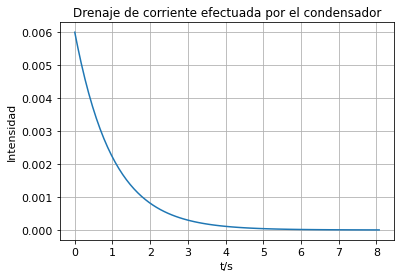

In [155]:
figura = plt.figure()
plt.title("Drenaje de corriente efectuada por el condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'], label="Una etiqueta")
plt.xlabel("t/s")
plt.ylabel("Intensidad")
plt.grid()

Al cerrar el circuito el condensador ira cargandose con la tensión de la bateria, a medida que la tensión es absorvida por el condensador la corriente sufrira un drenaje por la ingestión del voltaje por parte del condensador.

**Pregunta: Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne V1. ¿Por qué son opuestas? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda aquí. ¿Qué valores devuelve el análisis de tipo .op? Justifícalo.**

Cuando cerramos el circuito el condensador empieza a cargarse por lo que ira aumentado su carga y su voltaje. A medida que el condensador se carga,el circuito se va quedando sin corriente ya que el voltaje se va acumulando en el condensador. Cuando el condensador ha drenado todo el circuito tendrá todo el voltaje de la pila y en el circuito no habrá corriente, por eso las gráficas son opuestas ya que en una apreciamos como la intensidad tiende hacia cero y en el otra gráfica el condensador se va cargando.
El análisis de tipo .op, además de calcular el punto de trabajo, nos da información de los modelos en pequeña señal de los dispositivos.En este caso nos calcula la corriente y tensión del condensador.

Text(0, 0.5, 'Voltaje')

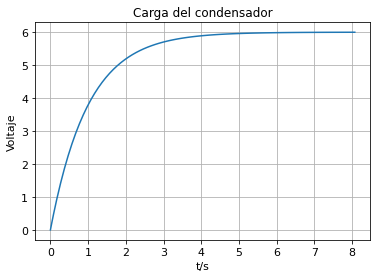

In [156]:
figura = plt.figure()
plt.title("Carga del condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Una etiqueta")
plt.grid()
plt.xlabel("t/s")
plt.ylabel("Voltaje")

En esta gráfica podemos apreciar como el condensador tarda casi 5 segundos en absorber la tensión de la pila,dejando al circuito drenado sin corriente, como se podía observar en la gráfica anterior


## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo:

<img src="conden_para.jpg">

Pregunta: Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. Aquí tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos).


In [157]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 1 0 type=vdc vdc=10
r1 1 2 3k
c1 2 3 47u ic=0
v1dummy 3 0 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 0 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [158]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


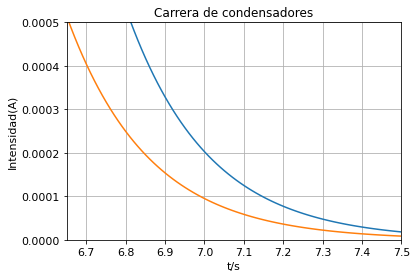

In [159]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.xlabel("t/s")
plt.grid()
plt.ylabel("Intensidad(A)")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")

El condensador C1 tiene una corriente inicial mayor que el condensador C2, esto es así porque el condensador C1 tiene mayor capacidad que el condesador C2 y por los tanto ofrece menos resistencia al paso de la corriente. Debido a esto el condensador C1 se va a saturar antes que el condensador C2.

Text(0, 0.5, 'Voltaje')

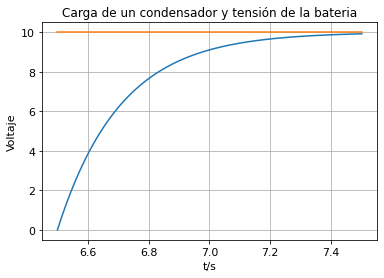

In [160]:
figura = plt.figure()
plt.title("Carga de un condensador y tensión de la bateria")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Una etiqueta")
plt.plot(resultados['tran']['T'], resultados['tran']['V1'], label="Una etiqueta")
plt.grid()
plt.xlabel("t/s")
plt.ylabel("Voltaje")

Al estar en paralelo los condensadores C1 Y C2 ,la tensión que van adquirir va a ser la misma,en este caso 10 voltios que es la tensión de la bateria.

**Circuitos en corriente alterna
Ejercicio : Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación.**

In [161]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 1 0 10k
.tran 1
.end

Overwriting corriente alterna.net


In [162]:
lts "corriente alterna.net"

In [163]:
%pycat corriente alterna.log

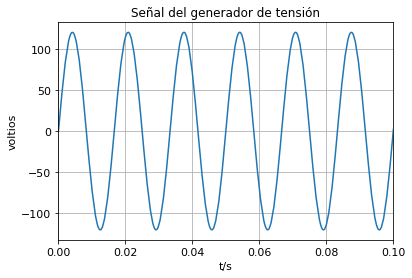

In [164]:
import ltspice
plt.title("Señal del generador de tensión")
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
plt.xlim(0, 0.10)
plt.ylabel("voltios")
plt.xlabel("t/s")
time = l.get_time()
V1 = l.get_data('V(1)')
plt.grid()
plt.plot(time, V1)

Podemos ver la tensión del generador que es 120 voltios de tensión de pico.

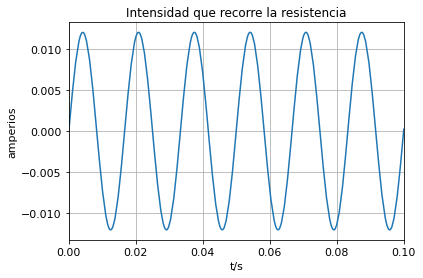

In [165]:
import ltspice
plt.title("Intensidad que recorre la resistencia")
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
plt.xlim(0, 0.10)
plt.ylabel("amperios")
time = l.get_time()
I1 = l.get_data('I(R1)')
plt.xlabel("t/s")
plt.grid()
plt.plot(time, I1)

Podemos ver la intensidad que pasa por el circuito, que tambien la podemos calcular:

$$
I=\frac{V}{R}=\frac{120V}{1000}=0.012 A
$$



In [166]:
%%writefile "circuito_alterna.ckt"
* Carga condensador
v0 0 1 type=sin 0 120 60 0 0
r1 1 0 10k
.tran tstep=0.1 tstart=0 tstop=1
.end

Overwriting circuito_alterna.ckt


In [167]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("circuito_alterna.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)


Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00049975


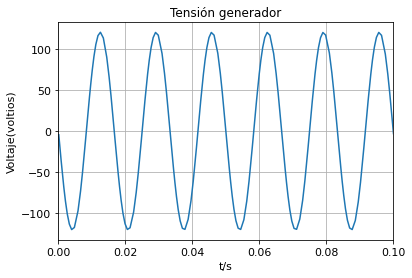

In [168]:
figura = plt.figure()
plt.title("Tensión generador")
plt.xlim(0, 0.10)
plt.ylabel("Voltaje(voltios)")
plt.xlabel("t/s")
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['V1'],label="Intensidad en C1")

Señal del generador de tensión,podemos ver que nos ofrece 120 v de pico.

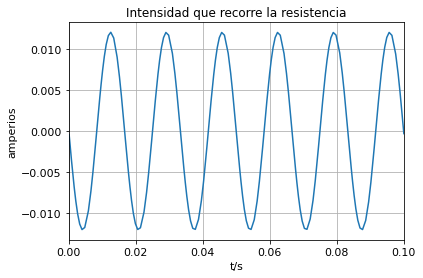

In [169]:
figura = plt.figure()
plt.title("Intensidad que recorre la resistencia")
plt.xlim(0, 0.10)
plt.ylabel("amperios")
plt.xlabel("t/s")
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V0)'],label="Intensidad por la resistencia")

Corriente que circula por el circuito,como hemos calculado antes nos da 0.012 A. Tambien podemos ver que tanto la señal del generador como la señal de corriente estan en fase,podemos llegar la conclusión que la resistencia no afecta a la fase de la señal.